## Customer Segmentation

### Objective of the project
- The objective of this project is to analyze customer behavioral and spending data and segment customers into meaningful groups using unsupervised learning techniques.
- By identifying patterns in income, purchase behavior, spending habits, and engagement levels, the project aims to help businesses understand different types of customers and support data-driven marketing and business decisions.

### Aim of the project
1.Group customers based on spending behavior, engagement, and purchase channels

2.Apply unsupervised clustering algorithms (K-Means, Hierarchical Clustering, DBSCAN)

3.Compare clustering results using visual and evaluation metrics

4.Interpret customer segments in simple business terms

5.Provide insights that can be used for targeted marketing, personalized offers, and customer retention strategies

#### Importing Libraries

In [1]:
# Data handling libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and clustering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

#### Load and Inspect the Dataset

In [2]:
# loading the dataset
df = pd.read_excel("marketing_campaign.xlsx")

In [3]:
# Display first five rows to understand the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
#shape of the data
df.shape

(2240, 29)

In [5]:
# Check dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
# Check for missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# filling missing income with median
df['Income'] = df['Income'].fillna(df['Income'].median())

In [8]:
# Check for missing values
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

#### Feature Engineering

In [9]:
# Creating Total_Spend by adding all product spending columns
# This represents overall customer value
df['Total_Spend'] = ( df['MntWines'] +
                      df['MntMeatProducts'] +
                      df['MntFishProducts'] +
                      df['MntSweetProducts'] +
                      df['MntGoldProds'])

# Creating Total_Purchases from web and store purchases
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumStorePurchases']

In [10]:
df[['Income', 'Recency', 'Total_Spend', 'Total_Purchases']].head()

,Income,Recency,Total_Spend,Total_Purchases
0,58138.0,58,1529,12
1,46344.0,38,26,3
2,71613.0,26,727,18
3,26646.0,26,49,6
4,58293.0,94,379,11


### Exploratory Data Analysis (EDA)

#### 1.Univariate Analysis
- Univariate analysis is performed to understand the distribution and behavior of individual variables without considering relationships with other variables. 
- It helps identify data spread, skewness, and potential outliers.

#### Distribution Plots

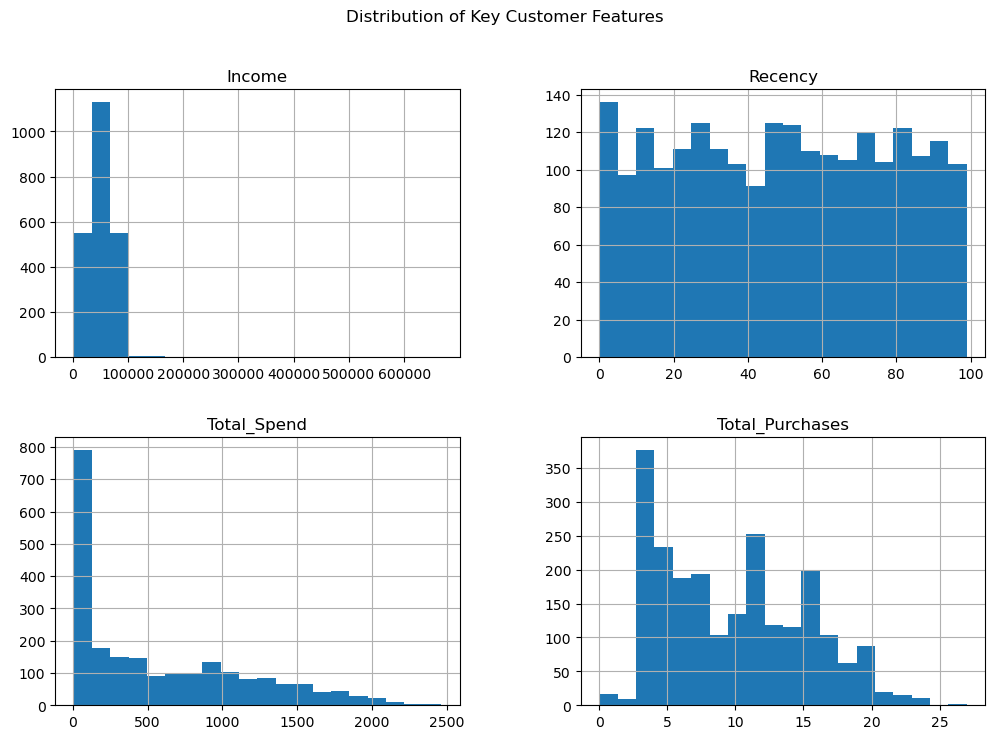

In [11]:
#Histograms
df[['Income', 'Recency', 'Total_Spend', 'Total_Purchases']].hist(bins=20,figsize=(12,8))
plt.suptitle("Distribution of Key Customer Features")
plt.show()

**Observations:**
- The Income distribution shows that most customers belong to low to middle income groups, with a smaller number of high-income customers who are potential premium buyers.

- The Recency histogram indicates that many customers have purchased recently, while some customers show high recency values, representing inactive or less engaged users.

- The Total Spend distribution is right-skewed, meaning most customers spend moderately, but a small group spends significantly more.

- The Total Purchases histogram shows that the majority of customers make a moderate number of purchases, while very frequent buyers are limited.

#### KDE Plots

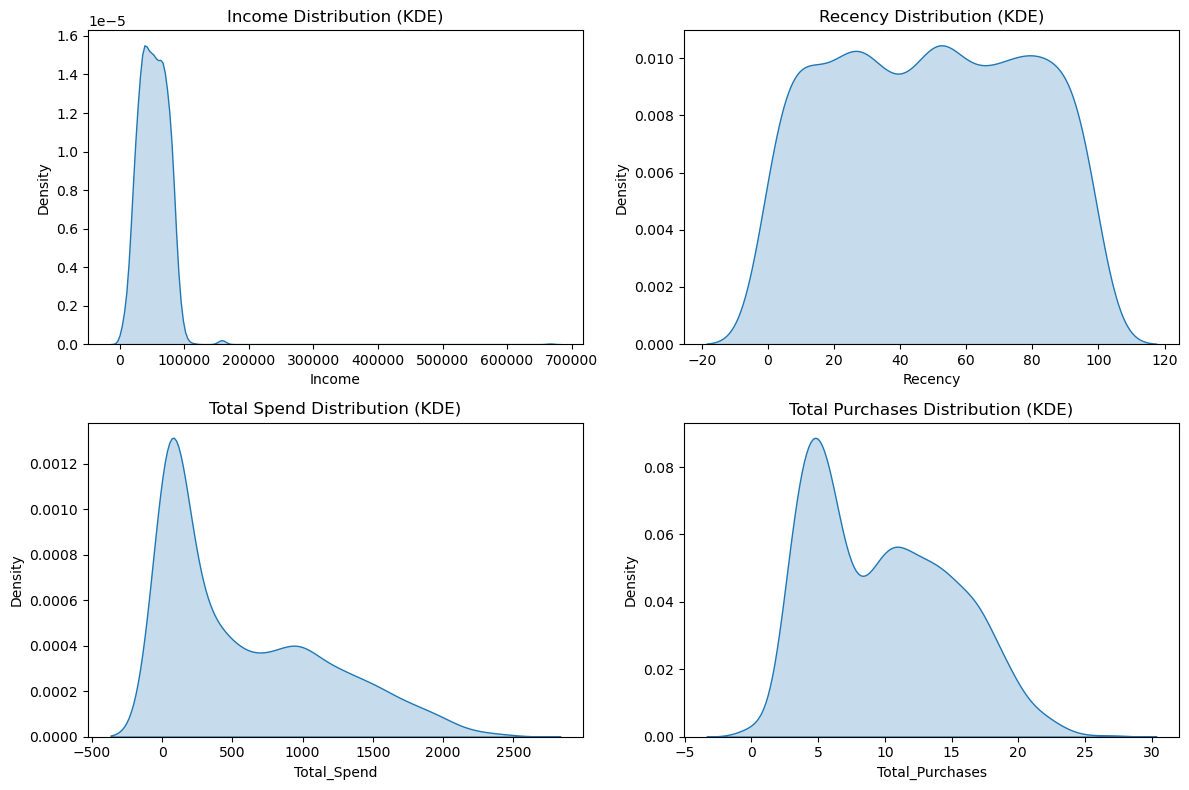

In [12]:
#Distribution (KDE) Plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.kdeplot(df['Income'], fill=True)
plt.title('Income Distribution (KDE)')

plt.subplot(2, 2, 2)
sns.kdeplot(df['Recency'], fill=True)
plt.title('Recency Distribution (KDE)')

plt.subplot(2, 2, 3)
sns.kdeplot(df['Total_Spend'], fill=True)
plt.title('Total Spend Distribution (KDE)')

plt.subplot(2, 2, 4)
sns.kdeplot(df['Total_Purchases'], fill=True)
plt.title('Total Purchases Distribution (KDE)')

plt.tight_layout()
plt.show()

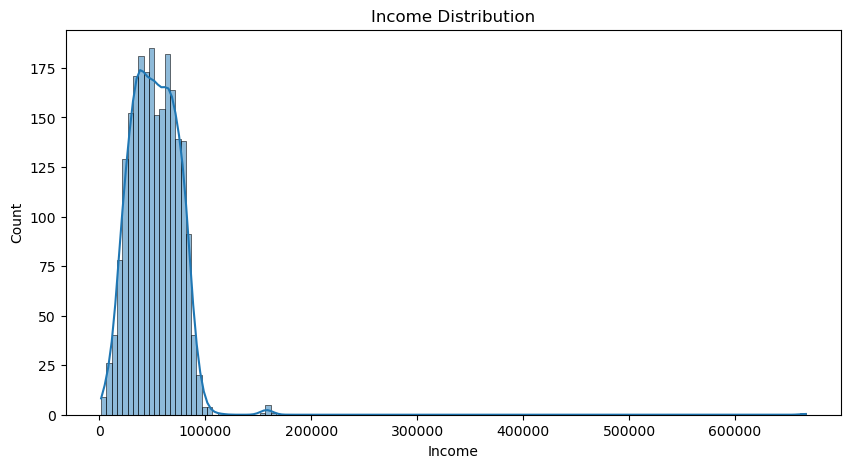

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['Income'], kde=True)
plt.title("Income Distribution")
plt.show()

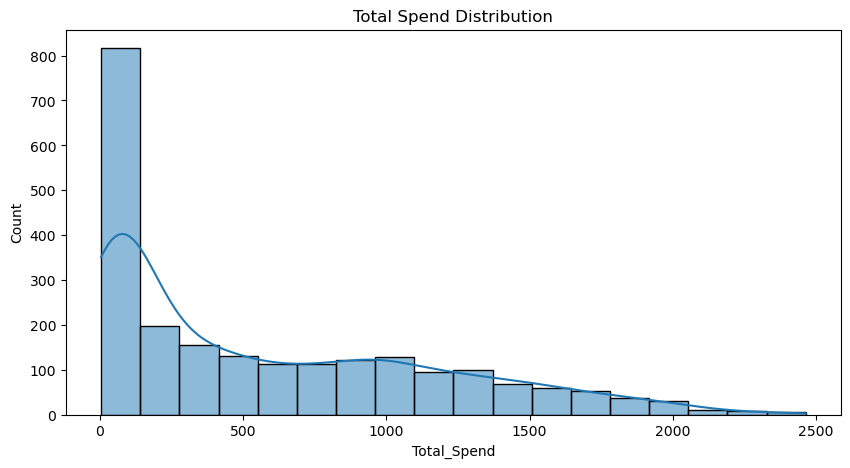

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['Total_Spend'], kde=True)
plt.title("Total Spend Distribution")
plt.show()

**Observations:**
- The Income KDE plot shows a right-skewed distribution, indicating that most customers fall in the low to medium income range, while a small group earns significantly more.

- The Recency KDE plot has higher density at lower values, suggesting that many customers have made purchases recently, reflecting good engagement.

- The Total Spend KDE plot is highly right-skewed, highlighting the presence of a small group of high-value customers with significantly higher spending.

- The Total Purchases KDE plot shows concentration around moderate purchase counts, with fewer customers making very frequent purchases.

#### Boxplots (Outlier Detection)

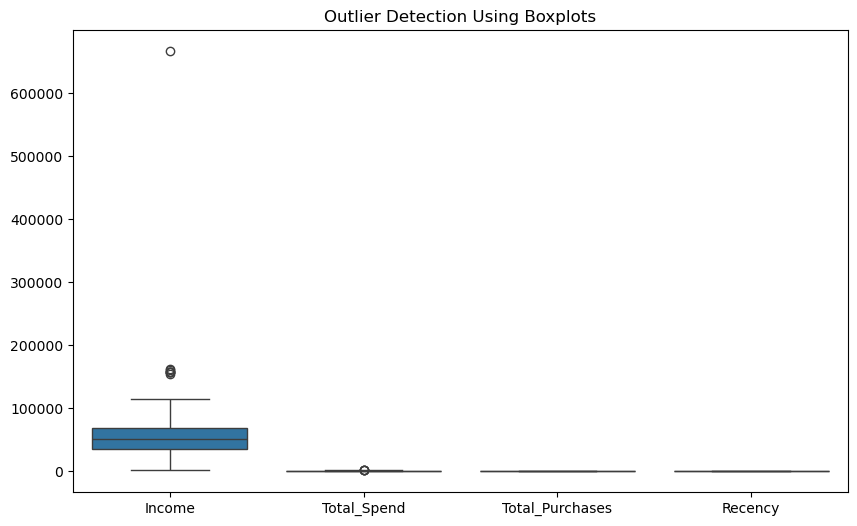

In [15]:
#Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Income', 'Total_Spend','Total_Purchases','Recency']])
plt.title('Outlier Detection Using Boxplots')
plt.show()

In [16]:
# Function to cap outliers using IQR method
def cap_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Capping the values
    df = np.where(df < lower_limit, lower_limit, df)
    df = np.where(df > upper_limit, upper_limit, df)

    return df

# Applying capping to selected columns
df['Income'] = cap_outliers(df['Income'])
df['Total_Spend'] = cap_outliers(df['Total_Spend'])

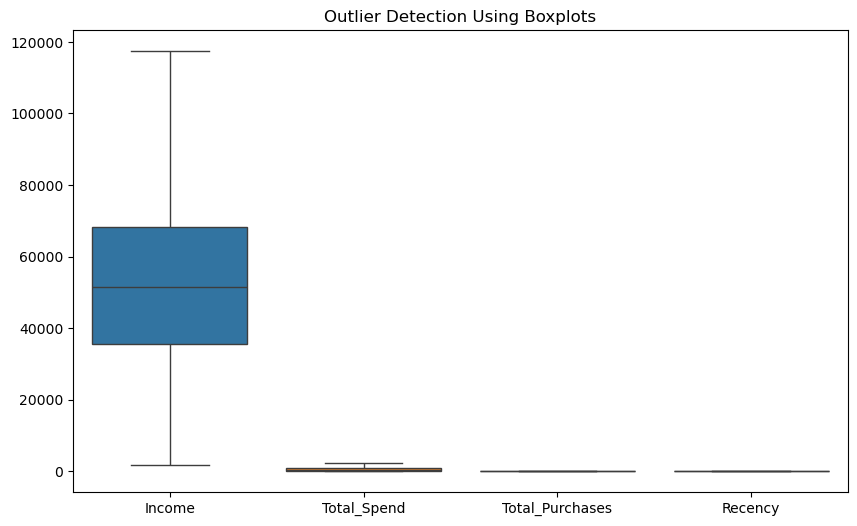

In [17]:
#Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Income', 'Total_Spend','Total_Purchases','Recency']])
plt.title('Outlier Detection Using Boxplots')
plt.show()

**Observation:**
- High-spending customers exist (important for segmentation)
- Few customers spend significantly more than others
- These high spenders are important for segmentation

**Insight from Univariate Analysis:**
- Univariate analysis highlights strong variability in customer income, spending, engagement, and purchase frequency.
  
- These variations indicate the presence of different customer types, making the dataset suitable for segmentation.

#### 2.Bivariate Analysis
- Bivariate analysis is used to understand the relationship between two variables and how customer features interact with each other. 
- This helps identify meaningful patterns for clustering.

#### Correlation Heatmap

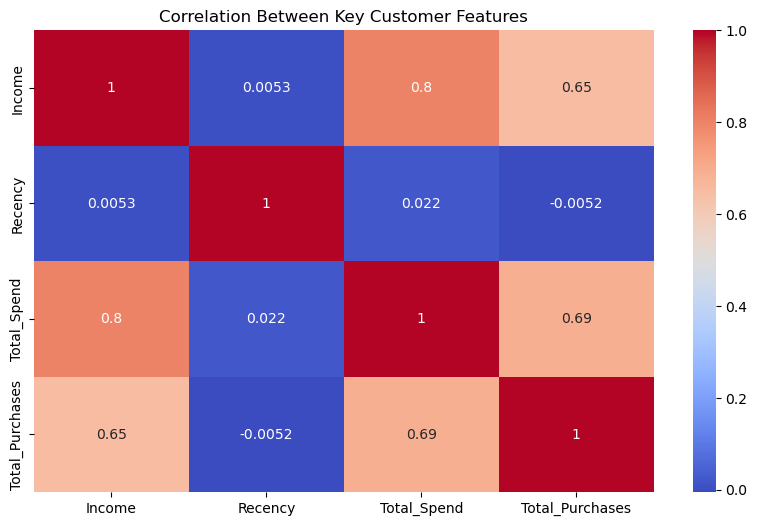

In [18]:
#Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap( df[['Income', 'Recency', 'Total_Spend', 'Total_Purchases']].corr(),
             annot=True,cmap='coolwarm')
plt.title('Correlation Between Key Customer Features')
plt.show()

**Observation:**
- Total_Spend is strongly related to Income
- Recency shows weak negative relation with spending

#### Pairplot

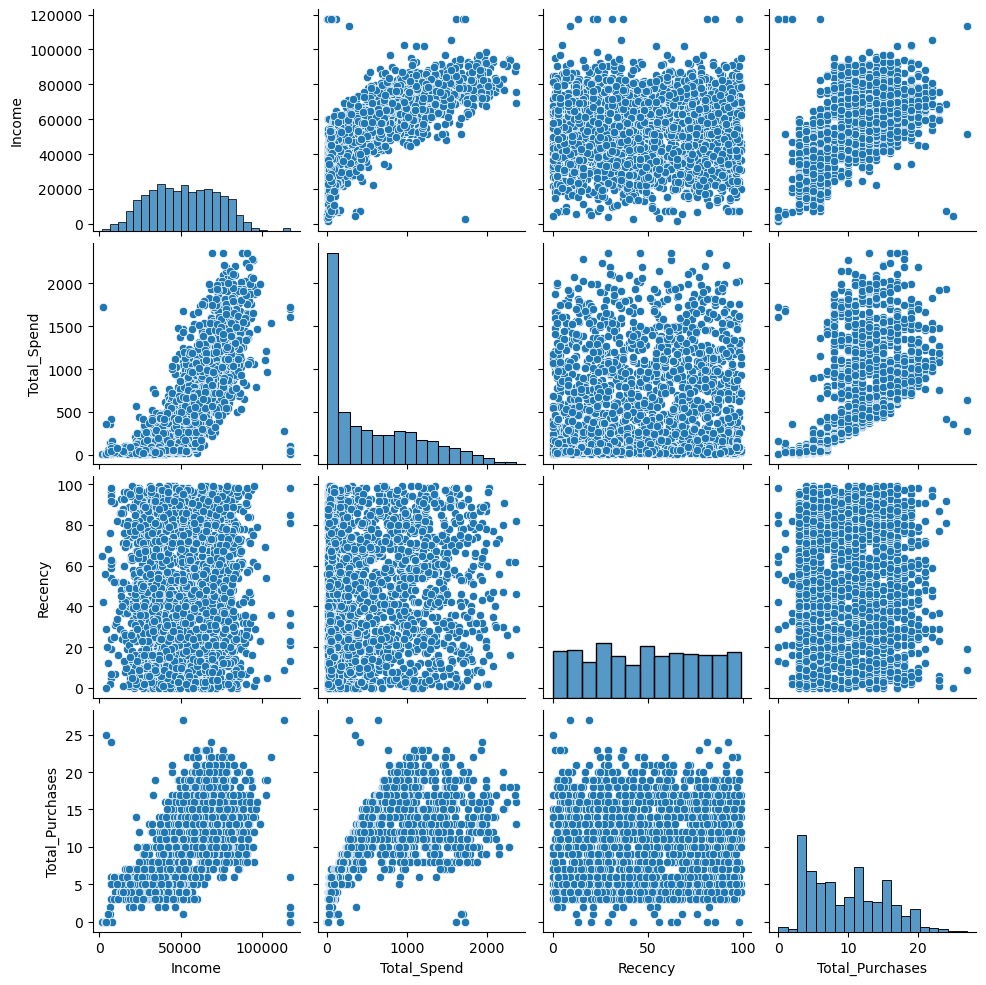

In [19]:
# Pairplot for selected important features
sns.pairplot(df[['Income', 'Total_Spend', 'Recency', 'Total_Purchases']],
             diag_kind='hist')
plt.show()

**Observations:**
- The pairplot highlights meaningful relationships between spending capacity, purchasing behavior, and engagement level.

- These visible patterns confirm that the selected features are suitable for customer segmentation using clustering techniques.

**Insight from Bivariate Analysis:**

- Bivariate analysis reveals meaningful relationships between customer income, spending, engagement, and purchasing behavior.
  
- These relationships support the selection of features for clustering and justify the use of unsupervised learning techniques.

#### Data Preprocessing (Scaling)

In [20]:
# Selecting features for clustering
features = df[['Income','Recency','Total_Spend','Total_Purchases']]

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## K-Means Clustering

### Elbow Method

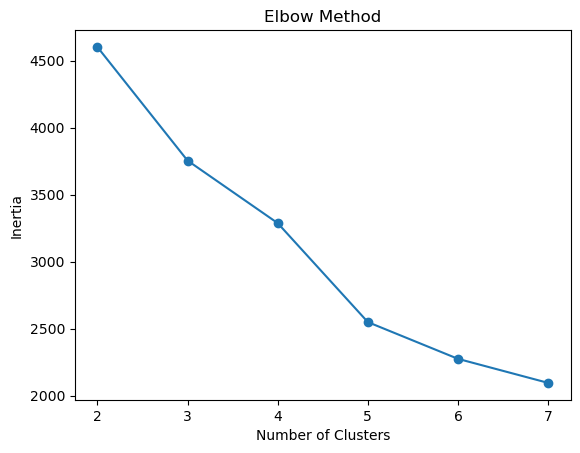

In [21]:
inertia = []

for k in range(2,8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

plt.plot(range(2,8), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

### Apply K-Means

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Silhouette Score
score = silhouette_score(scaled_features, df['KMeans_Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.3075824415550305


##  Hierarchical Clustering

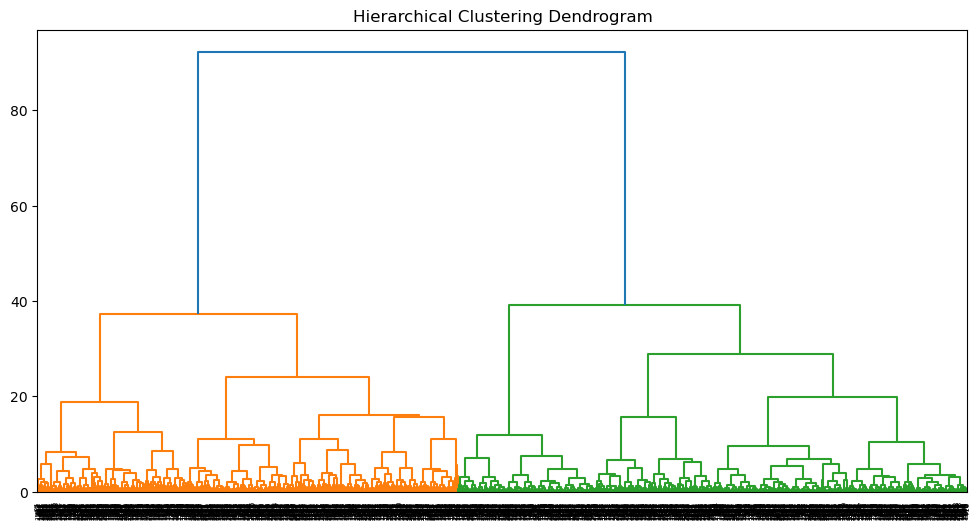

In [23]:
linked = linkage(scaled_features, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

## DBSCAN Clustering

In [24]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

df['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
 0    2227
-1      13
Name: count, dtype: int64

## PCA for Cluster Visualization

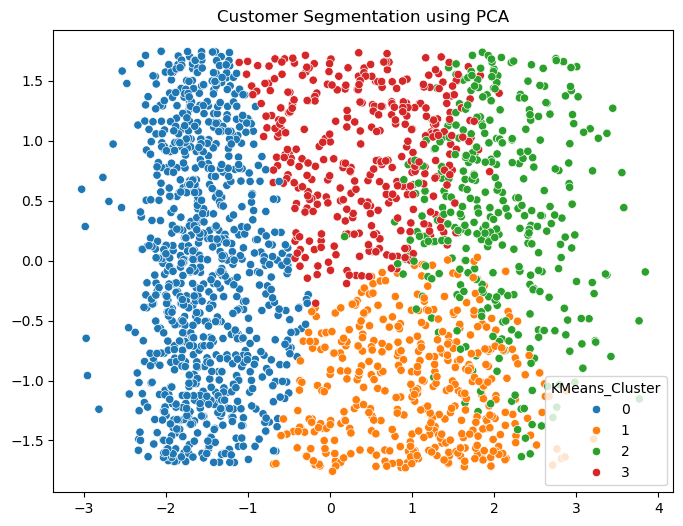

In [25]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca_data[:,0],
    y=pca_data[:,1],
    hue=df['KMeans_Cluster'],
    palette='tab10'
)
plt.title("Customer Segmentation using PCA")
plt.show()

## Cluster Interpretation

In [26]:
cluster_summary = df.groupby('KMeans_Cluster')[
    ['Income','Total_Spend','Recency','Total_Purchases']
].mean()

cluster_summary

,Income,Total_Spend,Recency,Total_Purchases
KMeans_Cluster,,,,
0,33209.539135,86.261586,47.219361,5.094748
1,64644.128022,820.773626,19.635165,14.206593
2,77320.094212,1488.369458,60.642857,13.756158
3,56686.421569,579.237745,75.000000,12.558824


In [27]:
import pickle

In [28]:
# Saving trained K-Means model
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# Saving scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and scaler saved successfully!")

✅ Model and scaler saved successfully!
